<i><h1 style="text-align:center;color:#FFFFF">Predictive Analytics : Caso I</h1></i>
<i><h3 style="text-align:center;color:#FFFFF">Compra/Venta de Autos nuevos y usados : Precios y Ventas Futuras</h3></i></i>
<i><h3 style="text-align:center;color:#FFFFF">Por : Roberto Muñoz Campos</h3></i></i>
<i><h3 style="text-align:center;color:#FFFFF">Bastián Rojas Gutierrez</h3></i></i>
<i><h3 style="text-align:center;color:#FFFFF">Matías Rojas Escobar</h3></i></i>
<i><h3 style="text-align:center;color:#FFFFF">Christian Vergara Retamal</h3></i></i>

In [1]:
# Librerías generales
import pandas as pd
import numpy as np
# Librerías para gráficos
import seaborn as sns
import matplotlib.pyplot as plt
# División de data 
from sklearn.model_selection import train_test_split
# Modelos a utilizar
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
# Métricas para Regresión
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Otras
import pickle #Serialización de modelos
import random #Aleatorio
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams["figure.dpi"] = 75 

## Análisis Exploratorio de los datos

In [3]:
dataframe = pd.read_csv("tdelux.csv", delimiter=";")

In [4]:
dataframe.shape

(1436, 30)

In [5]:
# Información general del dataframe
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 1436 non-null   int64 
 1   Model              1436 non-null   object
 2   Price              1436 non-null   int64 
 3   Mfg_Year           1436 non-null   int64 
 4   Sale_Year          1436 non-null   int64 
 5   Sale_Month         1436 non-null   int64 
 6   KM                 1436 non-null   int64 
 7   Fuel_Type          1436 non-null   object
 8   HP                 1436 non-null   int64 
 9   Met_Color          1436 non-null   int64 
 10  Color              1436 non-null   object
 11  Automatic          1436 non-null   int64 
 12  CC                 1436 non-null   int64 
 13  Doors              1436 non-null   int64 
 14  Cylinders          1436 non-null   int64 
 15  Gears              1436 non-null   int64 
 16  Quarterly_Tax      1436 non-null   int64 


In [6]:
# Descripción de variables numéricas del dataframe
dataframe.describe()

,Id,Price,Mfg_Year,Sale_Year,Sale_Month,KM,HP,Met_Color,Automatic,CC,...,ABS,Airbag_1,Airbag_2,Automatic_airco,Boardcomputer,Seat_Heater,Sport_Model,Backseat_Divider,Leather Seats,Parking_Assistant
count,1436.000000,1.436000e+03,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.00000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,718.500000,7.961942e+06,2016.614206,2019.275070,20.871170,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.81337,0.970752,0.722841,0.056407,0.294568,0.256964,0.300139,0.770195,0.204735,0.002786
std,414.681806,4.830235e+06,1.512381,0.858792,10.326016,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.38975,0.168559,0.447751,0.230786,0.456007,0.437111,0.458478,0.420854,0.403649,0.052723
min,1.000000,2.340800e+06,2015.000000,2018.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,359.750000,4.877561e+06,2015.000000,2019.000000,12.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,718.500000,6.327890e+06,2016.000000,2019.000000,23.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1077.250000,9.091785e+06,2018.000000,2020.000000,30.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1436.000000,3.859375e+07,2021.000000,2021.000000,36.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# Descripción de variables categóricas del dataframe
dataframe.describe(include="object")

,Model,Fuel_Type,Color
count,1436,1436,1436
unique,319,3,10
top,T-Delux 1.6 16V HATCHB LINEA TERRA 2/3-Doors,Gasolina,Grey
freq,109,1264,301


In [8]:
def grafs(df):
    """
    Genera graficos dependiendo del tipo de dato de la variable

    Parametros:
        dataframe: el dataframe a utilizar

    Retorno:
        grafico de la variable acorde a su tipo de dato

    """
    for index,col in enumerate(df):
        plt.figure(figsize=(12,100))
        plt.subplot((len(list(df.columns)))+1,1, index+1)
        titulo = str(f"Histograma de la variable '{col}'")
        texto_ejex = str(f"Valores de la variable '{col}'")
        
        if df[col].dtypes == "int64":
            sns.distplot(df[col])
            plt.title(titulo, weight='bold')
            plt.xlabel(texto_ejex)
            
        elif df[col].dtypes == "object":
            sns.countplot(df[col])
            plt.title(titulo, weight='bold')
            plt.xlabel(texto_ejex)
        else:
            sns.distplot(df[col], kde = False, bins = 20 ) 
            plt.title(titulo, weight='bold')
            plt.xlabel(texto_ejex)
    plt.tight_layout(h_pad=5)

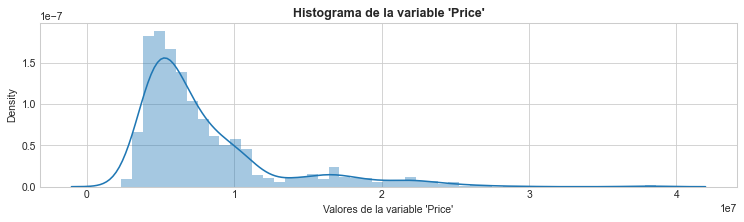

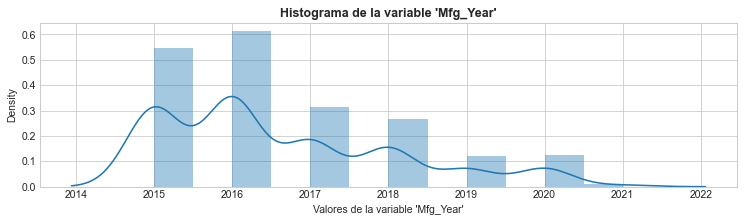

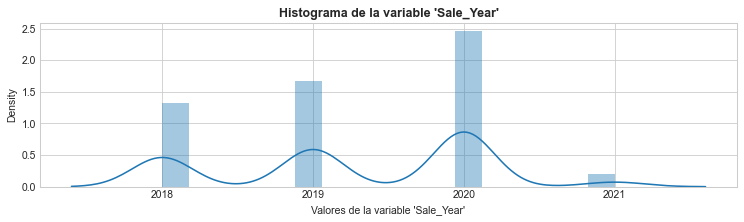

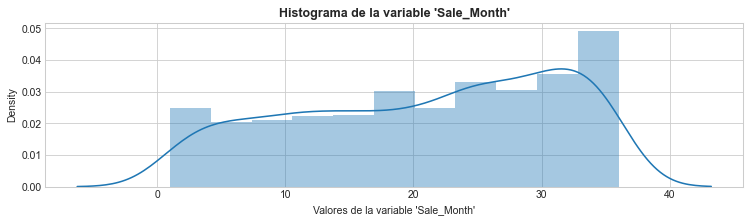

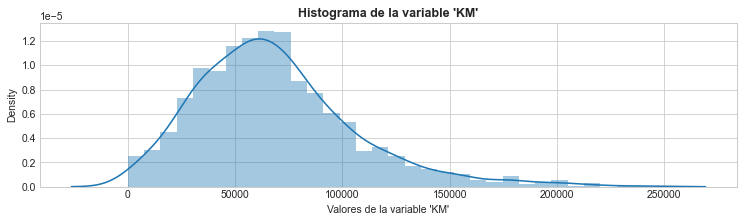

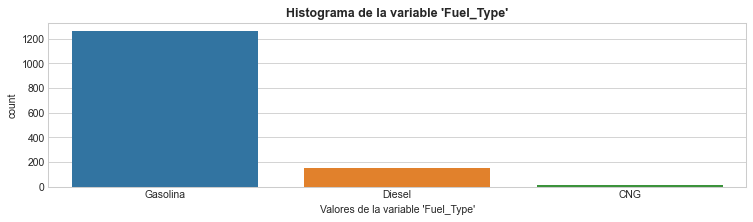

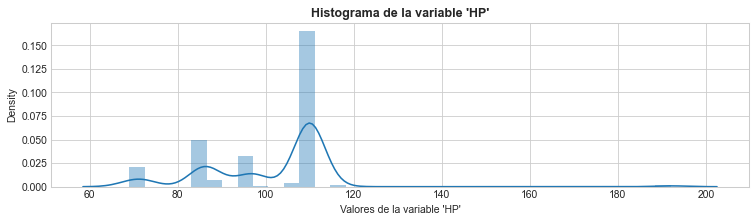

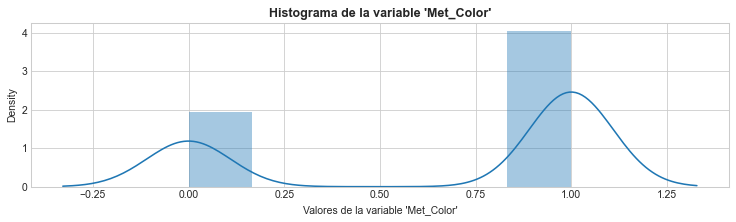

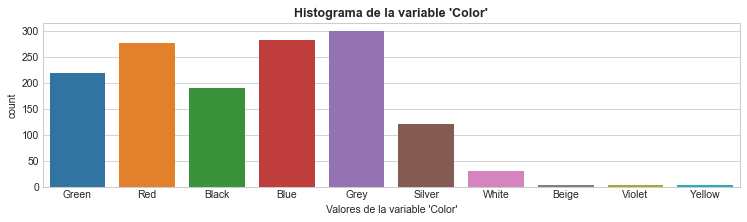

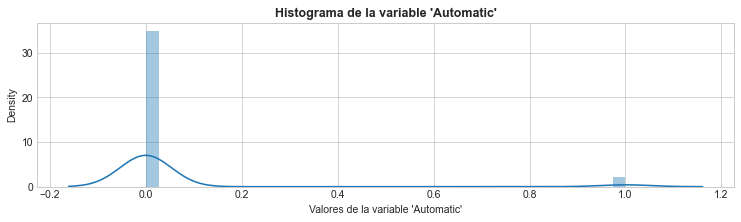

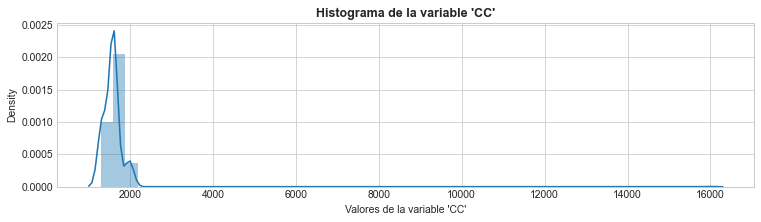

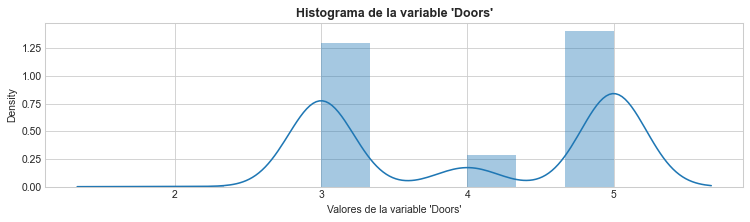

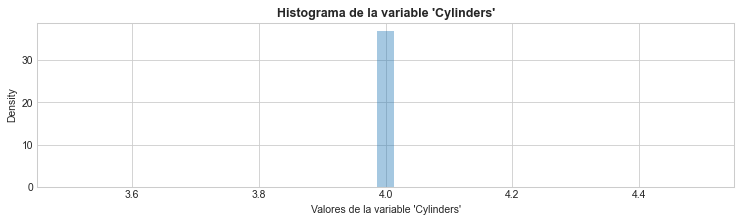

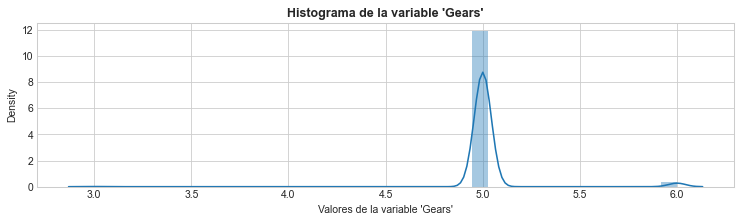

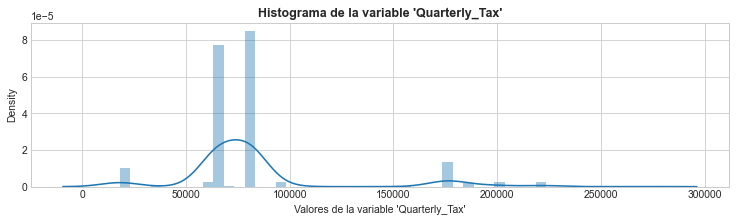

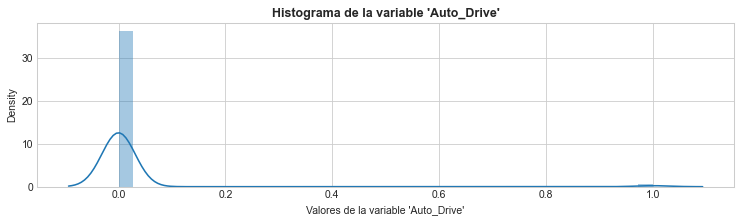

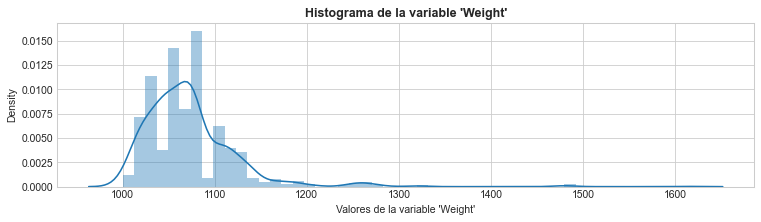

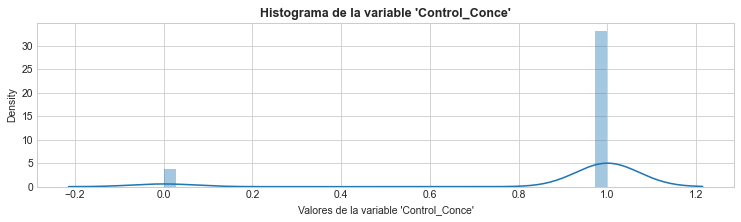

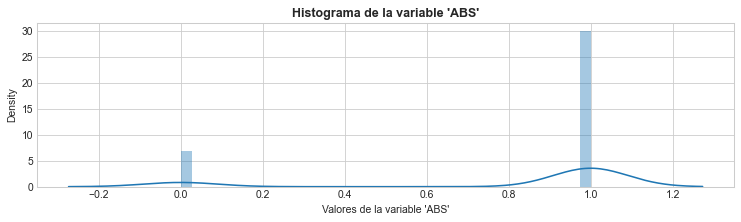

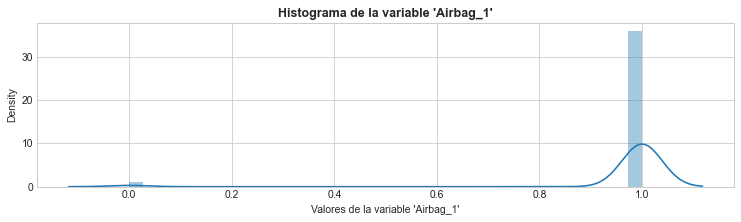

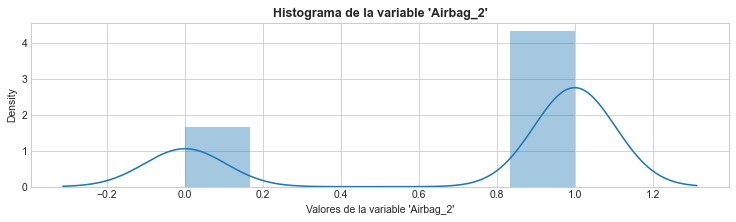

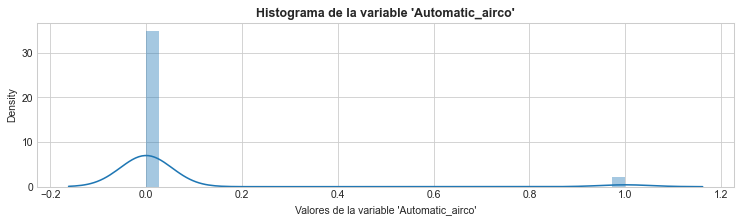

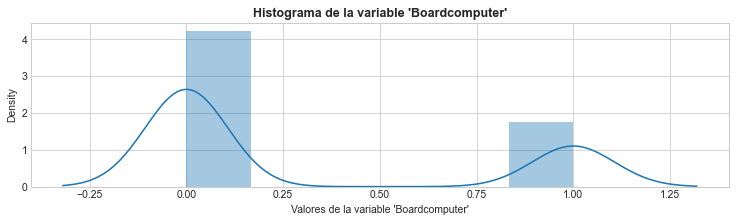

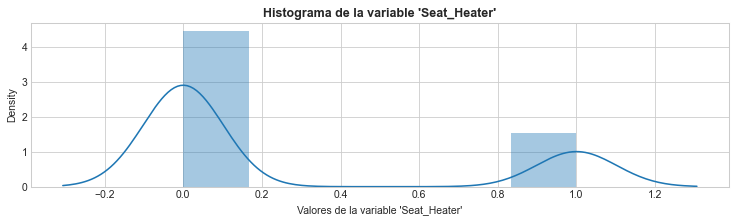

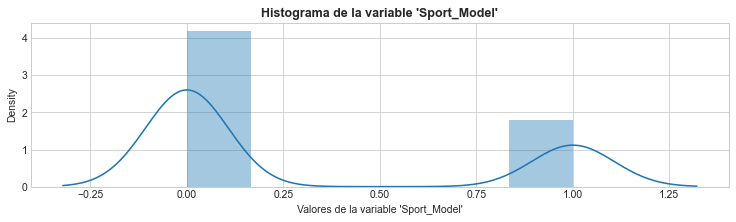

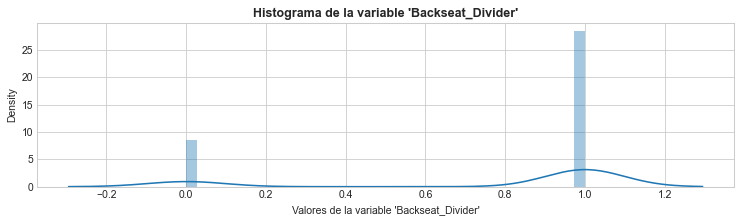

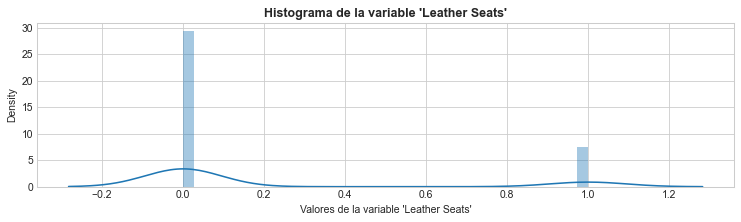

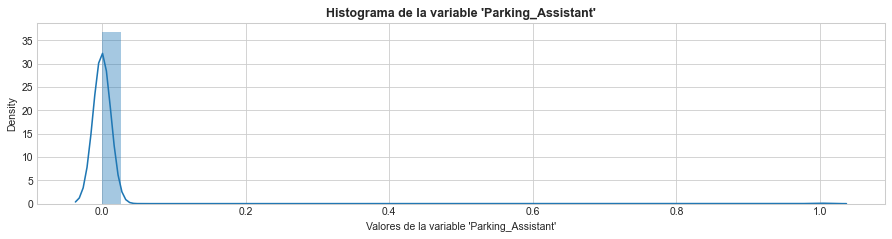

In [9]:
grafs(dataframe.drop(columns=["Id", "Model"]))

## Ejercicio 1 : LR multiple

In [10]:
train = pd.read_excel("tt.xlsx",sheet_name= "Train")

In [11]:
train.shape

(858, 37)

In [12]:
test = pd.read_excel("tt.xlsx",sheet_name= "Test")

In [13]:
test.shape

(572, 37)

In [14]:
train.columns

Index(['Id', 'Model', 'Price', 'Sale_Month', 'KM', 'HP', 'Met_Color',
       'Automatic', 'CC', 'Doors', 'Cylinders', 'Gears', 'Quarterly_Tax',
       'Auto_Drive', 'Weight', 'Control_Conce', 'ABS', 'Airbag_1', 'Airbag_2',
       'Automatic_airco', 'Boardcomputer', 'Seat_Heater', 'Sport_Model',
       'Backseat_Divider', 'Leather Seats', 'Parking_Assistant', 'Antiguedad',
       'Fuel_Type_Gasolina', 'Color_Black', 'Color_Blue', 'Color_Green',
       'Color_Grey', 'Color_Red', 'Color_Silver', 'Color_Violet',
       'Color_White', 'Color_Yellow'],
      dtype='object')

In [15]:
list_var_numericas = list(train.loc[:, ~train.columns.isin(["Id", "Model"])])

In [16]:
train.columns = train.columns.str.replace(" ", "")

In [17]:
train.columns

Index(['Id', 'Model', 'Price', 'Sale_Month', 'KM', 'HP', 'Met_Color',
       'Automatic', 'CC', 'Doors', 'Cylinders', 'Gears', 'Quarterly_Tax',
       'Auto_Drive', 'Weight', 'Control_Conce', 'ABS', 'Airbag_1', 'Airbag_2',
       'Automatic_airco', 'Boardcomputer', 'Seat_Heater', 'Sport_Model',
       'Backseat_Divider', 'LeatherSeats', 'Parking_Assistant', 'Antiguedad',
       'Fuel_Type_Gasolina', 'Color_Black', 'Color_Blue', 'Color_Green',
       'Color_Grey', 'Color_Red', 'Color_Silver', 'Color_Violet',
       'Color_White', 'Color_Yellow'],
      dtype='object')

In [18]:
variables = ' + '.join(list(train.loc[:, ~train.columns.isin(["Price", "Id", "Model"])]))

In [19]:
variables

'Sale_Month + KM + HP + Met_Color + Automatic + CC + Doors + Cylinders + Gears + Quarterly_Tax + Auto_Drive + Weight + Control_Conce + ABS + Airbag_1 + Airbag_2 + Automatic_airco + Boardcomputer + Seat_Heater + Sport_Model + Backseat_Divider + LeatherSeats + Parking_Assistant + Antiguedad + Fuel_Type_Gasolina + Color_Black + Color_Blue + Color_Green + Color_Grey + Color_Red + Color_Silver + Color_Violet + Color_White + Color_Yellow'

In [20]:
model = smf.ols(f"Price ~ {variables}", data = train).fit()

In [21]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     368.1
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        02:24:48   Log-Likelihood:                -13241.
No. Observations:                 858   AIC:                         2.655e+04
Df Residuals:                     824   BIC:                         2.671e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -9.19e+05   1.49

In [22]:
model.pvalues

Intercept              1.106334e-09
Sale_Month            1.557262e-125
KM                     5.790039e-15
HP                     1.074064e-01
Met_Color              3.317212e-01
Automatic              6.607465e-02
CC                     1.523843e-02
Doors                  1.008227e-01
Cylinders              1.106334e-09
Gears                  1.371117e-01
Quarterly_Tax          1.674273e-06
Auto_Drive             3.417768e-36
Weight                 2.709298e-33
Control_Conce          7.078837e-03
ABS                    2.807218e-03
Airbag_1               3.418497e-02
Airbag_2               6.763625e-01
Automatic_airco        1.075624e-24
Boardcomputer          3.284691e-04
Seat_Heater            3.211432e-04
Sport_Model            1.418507e-12
Backseat_Divider       1.344541e-03
LeatherSeats           4.180324e-03
Parking_Assistant      9.120621e-01
Antiguedad            8.945119e-161
Fuel_Type_Gasolina     1.309853e-07
Color_Black            1.754297e-01
Color_Blue             8.829

In [23]:
diccionario = model.pvalues.to_dict()

In [24]:
diccionario_refactorizado = {k:v for (k,v) in diccionario.items() if v < 0.01}

In [25]:
diccionario_refactorizado

{'Intercept': 1.1063344558193862e-09,
 'Sale_Month': 1.5572621743887696e-125,
 'KM': 5.7900385063544166e-15,
 'Cylinders': 1.1063344559332063e-09,
 'Quarterly_Tax': 1.674272892097566e-06,
 'Auto_Drive': 3.4177683209081187e-36,
 'Weight': 2.7092982210441902e-33,
 'Control_Conce': 0.0070788367273938654,
 'ABS': 0.002807218075539826,
 'Automatic_airco': 1.0756239210427444e-24,
 'Boardcomputer': 0.0003284691105695658,
 'Seat_Heater': 0.00032114322532127994,
 'Sport_Model': 1.4185069189614644e-12,
 'Backseat_Divider': 0.001344540813886652,
 'LeatherSeats': 0.00418032429127712,
 'Antiguedad': 8.945118834366456e-161,
 'Fuel_Type_Gasolina': 1.3098532746821554e-07}

In [26]:
lista_var = list(diccionario_refactorizado.keys())

In [27]:
lista_var.remove("Intercept")

In [28]:
variables_refact = ' + '.join(list(train.loc[:, train.columns.isin(lista_var)]))

In [29]:
model_depurado = smf.ols(f"Price ~ {variables_refact}", data = train).fit()

In [30]:
print(model_depurado.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     775.4
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        02:24:49   Log-Likelihood:                -13267.
No. Observations:                 858   AIC:                         2.657e+04
Df Residuals:                     842   BIC:                         2.664e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -8.919e+05   9.49

* Con el modelo Normal depurado, es decir, incluyendo solo las variables cuyo p valor es menor a 0.01, obtenemos un $R^{2} = 0.932$, es decir nuestro modelo depurado con las variables regresoras significativas, explica en un ~93% la variablidad de nuestro objetivo, en este caso, el precio del automovil.

In [31]:
test.columns = test.columns.str.replace(" ", "")
predictions = model_depurado.predict(test)

In [32]:
df_results = pd.DataFrame()

In [33]:
df_results["y_real"] = test["Price"]
df_results["y_predict"] = predictions

In [34]:
df_results

,y_real,y_predict
0,13812525,1.354508e+07
1,11023087,1.243706e+07
2,6019200,7.349472e+06
3,18529227,1.815147e+07
4,8438375,1.008288e+07
...,...,...
567,18614062,1.906411e+07
568,5990118,7.271269e+06
569,4871790,4.100064e+06
570,4845000,4.860930e+06


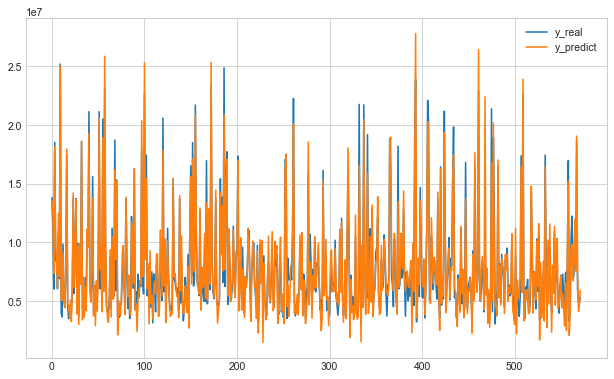

In [35]:
df_results.plot(y=["y_real", "y_predict"])
plt.show()

## Ejercicio 2 : Refact 4 variables

In [36]:
traincp = train.copy()
testcp = test.copy()

In [37]:
traincp["Deluxe"] = np.where(((traincp["Sport_Model"] == 1) 
                            & (traincp["LeatherSeats"] == 1) 
                            & (traincp["Seat_Heater"] == 1) 
                            & (traincp["Auto_Drive"] == 1)),1,0)

In [38]:
testcp["Deluxe"] = np.where(((testcp["Sport_Model"] == 1) 
                            & (testcp["LeatherSeats"] == 1) 
                            & (testcp["Seat_Heater"] == 1) 
                            & (testcp["Auto_Drive"] == 1)),1,0)

In [39]:
traincp.drop(columns = ["Sport_Model", "LeatherSeats", "Seat_Heater", "Auto_Drive"], axis=1, inplace=True)
testcp.drop(columns = ["Sport_Model", "LeatherSeats", "Seat_Heater", "Auto_Drive"], axis=1, inplace=True)

In [40]:
traincp.columns

Index(['Id', 'Model', 'Price', 'Sale_Month', 'KM', 'HP', 'Met_Color',
       'Automatic', 'CC', 'Doors', 'Cylinders', 'Gears', 'Quarterly_Tax',
       'Weight', 'Control_Conce', 'ABS', 'Airbag_1', 'Airbag_2',
       'Automatic_airco', 'Boardcomputer', 'Backseat_Divider',
       'Parking_Assistant', 'Antiguedad', 'Fuel_Type_Gasolina', 'Color_Black',
       'Color_Blue', 'Color_Green', 'Color_Grey', 'Color_Red', 'Color_Silver',
       'Color_Violet', 'Color_White', 'Color_Yellow', 'Deluxe'],
      dtype='object')

In [41]:
testcp.columns

Index(['Id', 'Model', 'Price', 'Sale_Month', 'KM', 'HP', 'Met_Color',
       'Automatic', 'CC', 'Doors', 'Cylinders', 'Gears', 'Quarterly_Tax',
       'Weight', 'Control_Conce', 'ABS', 'Airbag_1', 'Airbag_2',
       'Automatic_airco', 'Boardcomputer', 'Backseat_Divider',
       'Parking_Assistant', 'Antiguedad', 'Fuel_Type_Gasolina', 'Color_Black',
       'Color_Blue', 'Color_Green', 'Color_Grey', 'Color_Red', 'Color_Silver',
       'Color_Violet', 'Color_White', 'Color_Yellow', 'Deluxe'],
      dtype='object')

In [42]:
traincp.Deluxe.value_counts()

0    852
1      6
Name: Deluxe, dtype: int64

In [43]:
testcp.Deluxe.value_counts()

0    567
1      5
Name: Deluxe, dtype: int64

<AxesSubplot:>

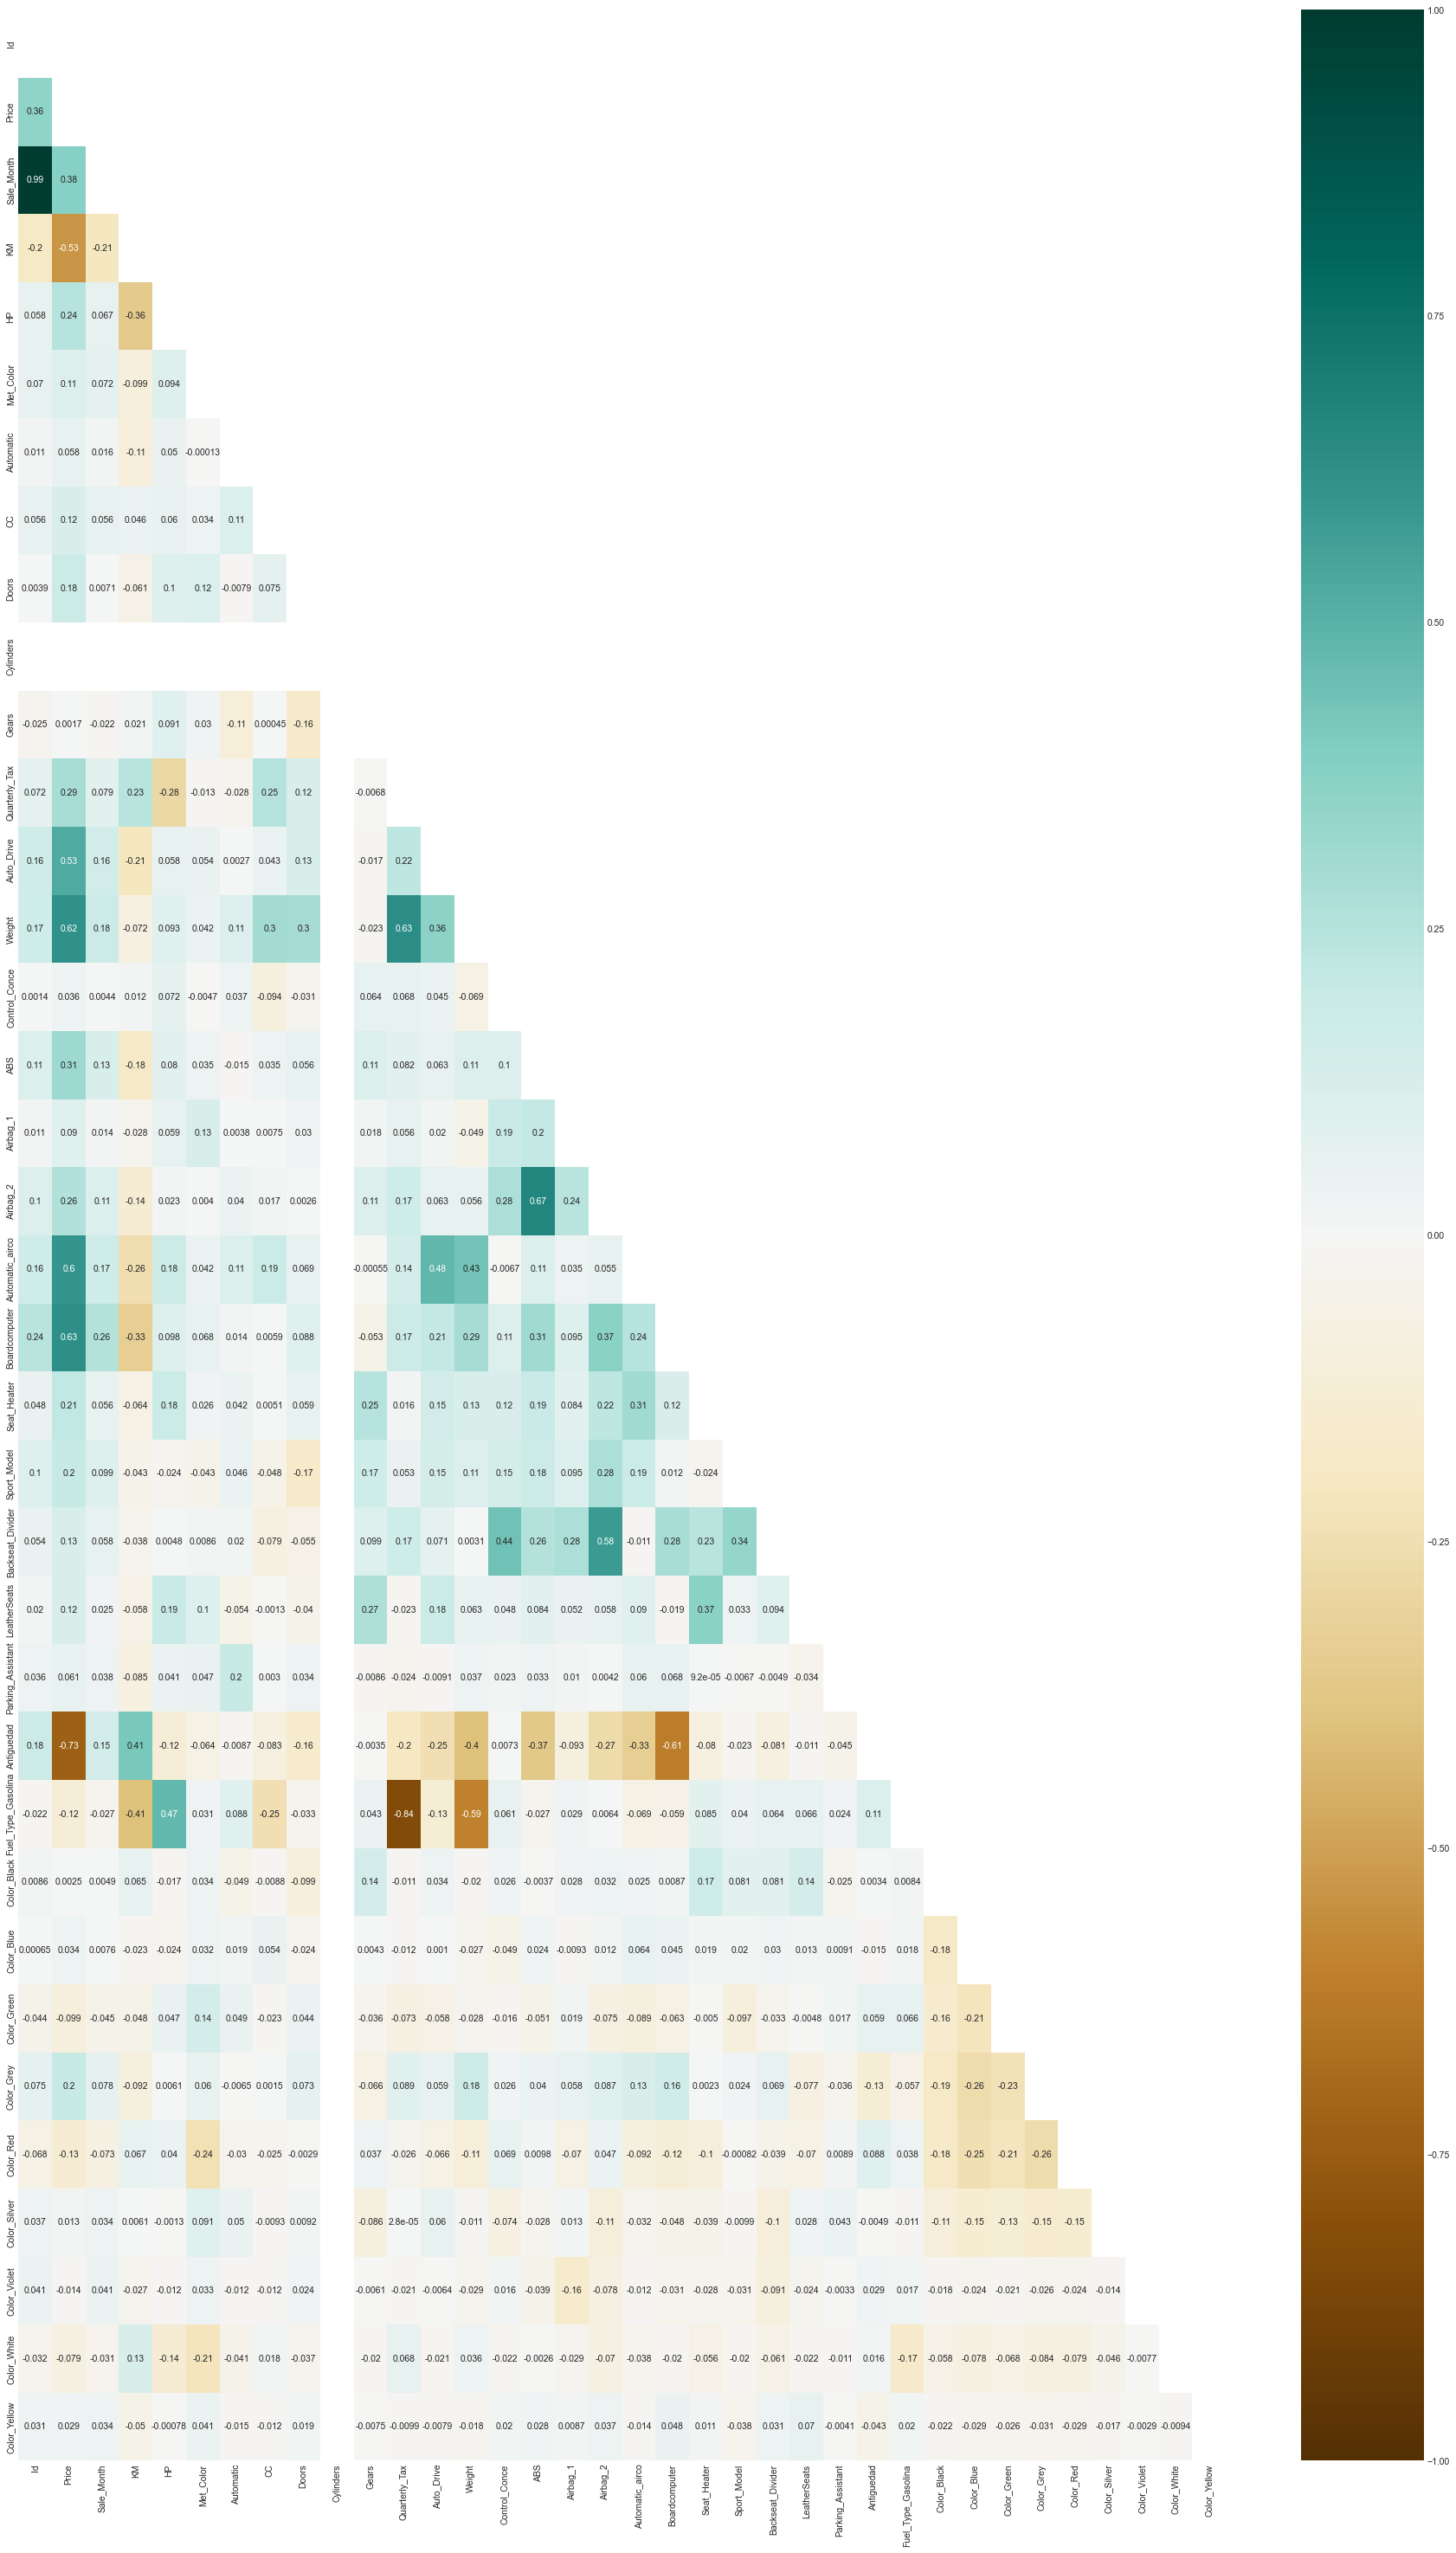

In [44]:
mask = np.triu(np.ones_like(train.corr(), dtype=np.bool))
plt.figure(figsize=(30,50))
mat_corr = train.corr()
sns.heatmap(mat_corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [73]:
traincp.to_excel("train2.xlsx", index_label=False)
testcp.to_excel("test2.xlsx", index_label=False)

## Modelado

In [46]:
list_var_numericas_2 = list(traincp.loc[:, ~traincp.columns.isin(["Id", "Model"])])

In [47]:
traincp.columns = traincp.columns.str.replace(" ", "")

In [71]:
traincp.columns

Index(['Id', 'Model', 'Price', 'Sale_Month', 'KM', 'HP', 'Met_Color',
       'Automatic', 'CC', 'Doors', 'Cylinders', 'Gears', 'Quarterly_Tax',
       'Weight', 'Control_Conce', 'ABS', 'Airbag_1', 'Airbag_2',
       'Automatic_airco', 'Boardcomputer', 'Backseat_Divider',
       'Parking_Assistant', 'Antiguedad', 'Fuel_Type_Gasolina', 'Color_Black',
       'Color_Blue', 'Color_Green', 'Color_Grey', 'Color_Red', 'Color_Silver',
       'Color_Violet', 'Color_White', 'Color_Yellow', 'Deluxe'],
      dtype='object')

In [72]:
testcp.columns

Index(['Id', 'Model', 'Price', 'Sale_Month', 'KM', 'HP', 'Met_Color',
       'Automatic', 'CC', 'Doors', 'Cylinders', 'Gears', 'Quarterly_Tax',
       'Weight', 'Control_Conce', 'ABS', 'Airbag_1', 'Airbag_2',
       'Automatic_airco', 'Boardcomputer', 'Backseat_Divider',
       'Parking_Assistant', 'Antiguedad', 'Fuel_Type_Gasolina', 'Color_Black',
       'Color_Blue', 'Color_Green', 'Color_Grey', 'Color_Red', 'Color_Silver',
       'Color_Violet', 'Color_White', 'Color_Yellow', 'Deluxe'],
      dtype='object')

In [49]:
variables2 = ' + '.join(list(traincp.loc[:, ~traincp.columns.isin(["Price", "Id", "Model"])]))

In [50]:
model_2 = smf.ols(f"Price ~ {variables2}", data = traincp).fit()

In [51]:
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     322.1
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        02:24:54   Log-Likelihood:                -13334.
No. Observations:                 858   AIC:                         2.673e+04
Df Residuals:                     827   BIC:                         2.688e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.412e+06   1.57

In [52]:
model_2.pvalues

Intercept              1.352432e-18
Sale_Month            5.497922e-111
KM                     1.842903e-14
HP                     7.448792e-01
Met_Color              4.161338e-01
Automatic              2.974479e-02
CC                     3.309845e-04
Doors                  1.169532e-02
Cylinders              1.352432e-18
Gears                  5.679995e-01
Quarterly_Tax          1.686675e-07
Weight                 4.183311e-44
Control_Conce          2.747804e-03
ABS                    4.115770e-02
Airbag_1               3.332364e-02
Airbag_2               4.504151e-01
Automatic_airco        1.528331e-44
Boardcomputer          3.064758e-02
Backseat_Divider       4.444865e-01
Parking_Assistant      5.939238e-01
Antiguedad            8.786618e-138
Fuel_Type_Gasolina     1.908795e-10
Color_Black            2.827211e-01
Color_Blue             1.953381e-01
Color_Green            4.713573e-01
Color_Grey             2.292595e-01
Color_Red              2.873146e-01
Color_Silver           2.026

In [53]:
diccionario2 = model_2.pvalues.to_dict()

In [54]:
diccionario_refactorizado2 = {k:v for (k,v) in diccionario2.items() if v < 0.01}

In [55]:
diccionario_refactorizado2

{'Intercept': 1.352432046698514e-18,
 'Sale_Month': 5.4979216562704264e-111,
 'KM': 1.842903491602347e-14,
 'CC': 0.00033098453862664317,
 'Cylinders': 1.3524320466972393e-18,
 'Quarterly_Tax': 1.6866746489173702e-07,
 'Weight': 4.183310671960078e-44,
 'Control_Conce': 0.002747803543343487,
 'Automatic_airco': 1.528331182189477e-44,
 'Antiguedad': 8.786618412806123e-138,
 'Fuel_Type_Gasolina': 1.908794923500351e-10,
 'Deluxe': 1.8131688615321266e-13}

In [56]:
lista_var2 = list(diccionario_refactorizado2.keys())

In [57]:
lista_var2.remove("Intercept")

In [58]:
variables_refact2 = ' + '.join(list(traincp.loc[:, traincp.columns.isin(lista_var2)]))

In [59]:
model_depurado_2 = smf.ols(f"Price ~ {variables_refact2}", data = traincp).fit()

In [60]:
print(model_depurado_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     927.7
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        02:24:56   Log-Likelihood:                -13360.
No. Observations:                 858   AIC:                         2.674e+04
Df Residuals:                     847   BIC:                         2.679e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.162e+06   1.01

* Con el modelo Deluxe depurado, es decir, incluyendo solo las variables cuyo p valor es menor a 0.01, obtenemos un $R^{2} = 0.916$, es decir nuestro modelo depurado con las variables regresoras significativas, explica en un ~91% la variablidad de nuestro objetivo, en este caso, el precio del automovil.

In [61]:
testcp.columns = testcp.columns.str.replace(" ", "")
predictions_2 = model_depurado_2.predict(testcp)

In [62]:
df_results2 = pd.DataFrame()

In [63]:
df_results2["y_real"] = testcp["Price"]
df_results2["y_predict"] = predictions_2

In [64]:
df_results2

,y_real,y_predict
0,13812525,1.417784e+07
1,11023087,1.251413e+07
2,6019200,7.768500e+06
3,18529227,1.999351e+07
4,8438375,1.028826e+07
...,...,...
567,18614062,1.973035e+07
568,5990118,7.222680e+06
569,4871790,3.758902e+06
570,4845000,5.043024e+06


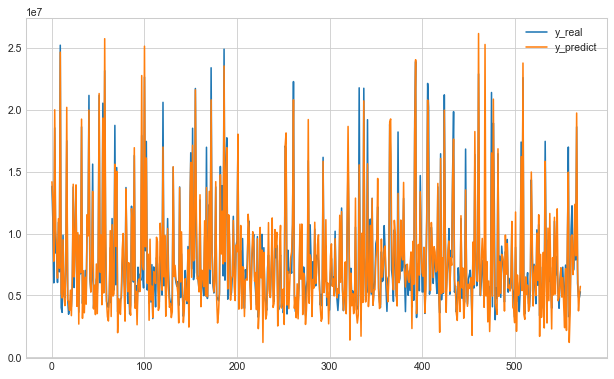

In [65]:
df_results2.plot(y=["y_real", "y_predict"])
plt.show()

## Comparaciones

In [66]:
def report_scores(modelo_yhat, y_test):
    """Reporta el error cuadrático promedio y r2_score. Se obtuvo del desafío 
        'Regresión desde el aprendizaje de máquinas'
    Parametros:
        modelo_yhat(df.array): Vector calculado por el modelo
        y_test(df.array): Vector con datos reales que se comparará con modelo_yhat
    Retorno:
        Imprime el resultado de las métricas
    """
    modelo_mse = mean_squared_error(y_test, modelo_yhat).round(2)
    modelo_mae = mean_absolute_error(y_test, modelo_yhat).round(2)
    modelo_r2 = r2_score(y_test, modelo_yhat).round(2)
    print(f"Error cuadrático promedio (mse): {modelo_mse}")
    print(f"Error absoluto promedio (mae): {modelo_mae}")
    print(f"R Cuadrado (R^2): {modelo_r2}")

In [67]:
report_scores(df_results["y_predict"],df_results["y_real"])

Error cuadrático promedio (mse): 1798434781702.06
Error absoluto promedio (mae): 957626.18
R Cuadrado (R^2): 0.91


In [68]:
report_scores(df_results2["y_predict"],df_results2["y_real"])

Error cuadrático promedio (mse): 2190551496527.09
Error absoluto promedio (mae): 1043105.94
R Cuadrado (R^2): 0.89


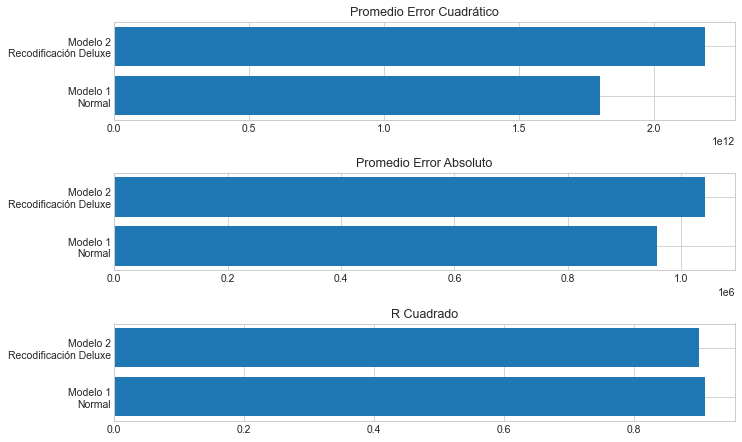

In [69]:
m1_mse = mean_squared_error(df_results["y_predict"],df_results["y_real"]).round(2)
m1_mae  = mean_absolute_error(df_results["y_predict"],df_results["y_real"]).round(2)
m1_r2 = r2_score(df_results["y_predict"],df_results["y_real"]).round(2)
m2_mse = mean_squared_error(df_results2["y_predict"],df_results2["y_real"]).round(2)
m2_mae = mean_absolute_error(df_results2["y_predict"],df_results2["y_real"]).round(2)
m2_r2 = r2_score(df_results2["y_predict"],df_results2["y_real"]).round(2)
plt.subplot(3,1,1)
plt.barh(['Modelo 1\nNormal', 'Modelo 2\nRecodificación Deluxe'], [m1_mse, m2_mse])
plt.title("Promedio Error Cuadrático")
plt.subplot(3,1,2)
plt.barh(['Modelo 1\nNormal', 'Modelo 2\nRecodificación Deluxe'], [m1_mae, m2_mae])
plt.title("Promedio Error Absoluto")
plt.subplot(3,1,3)
plt.barh(['Modelo 1\nNormal', 'Modelo 2\nRecodificación Deluxe'], [m1_r2, m2_r2])
plt.title("R Cuadrado")
plt.tight_layout()

* Mediante los resultados obtenidos y reflejados en la gráfica, se puede observar que el mejor modelo para predecir el precio de los automóviles dada sus características, corresponde al Modelo Normal, es decir, sin la recodificación de la variable Deluxe. Esto debido a que, comparando el promedio de error absoluto y promedio de error cuadrático para ambos modelos, existe evidencia para preferir el Modelo mencionado dado que, en primer lugar presenta una reducción de Error Absoluto promedio $MAE_{modeloNormal} = 957626.18 < MAE_{modeloDeluxe} = 1043105.94$, por otra parte, presenta una disminución de Error Cuadrático Promedio $MSE_{modeloNormal} = 1798434781702.06 < MSE_{modeloDeluxe} = 2190551496527.09$. Finalmente, si evaluamos $R^2$, se observa que el modelo normal posee un mayor valor con un $R^2=0.91$ mayor al del modelo Deluxe $R^2=0.89$.